<a href="https://colab.research.google.com/github/vivekpenuli/confusion-matrix-and-auc-roc/blob/master/roc_auc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import pandas as pd
url="https://raw.githubusercontent.com/vivekpenuli/confusion-matrix-and-auc-roc/master/pima-indians-diabetes.csv"

In [107]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

df=pd.read_csv(url,names=col_names)

In [108]:
df.head(5)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [109]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = df[feature_cols]
y = df.label

checking score using  accuracy method

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,StratifiedKFold

In [111]:
skk=StratifiedKFold(shuffle=True,n_splits=10)
logreg = LogisticRegression()
score=cross_val_score(logreg,X,y,cv=skk,scoring='accuracy')
print(score.mean())


0.6875256322624743


accuracy using confusion matrix


In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [113]:
from sklearn.metrics import confusion_matrix
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
print(model.predict([[0,168,43.1,33]]))  # so after training we precidct the value but what is the probability that it is one let check it out below

[1]


In [115]:
pre=model.predict(X_test)
matrix=confusion_matrix(y_test,pre)
print(matrix)

[[114  16]
 [ 46  16]]


In [116]:
print('True:', y_test.values[0:25])
print('Pred:', pre[0:25])
#print('pred proba',model_pr)

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


more easy way to understand confusion matrix 

In [117]:
print('True:', y_test.values[0:10])
print('Pred:', pre[0:10])
matrix1=confusion_matrix(y_test[:10],pre[:10])
print(matrix1)

True: [1 0 0 1 0 0 1 1 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1]
[[5 1]
 [3 1]]


In [118]:
confusion1 = confusion_matrix(y_test[:10],pre[:10])
TP1 = confusion1[1, 1]  
TN1 = confusion1[0, 0]  
FP1 = confusion1[0, 1]  
FN1 = confusion1[1, 0]
print("sensitivity" + " " , TP1 / float(TP1 + FN1))
print("specificity" + " " ,TN1 / float(TN1 + FP1))
print("precision" + " ", TP1/float(TP1+FP1))

sensitivity  0.25
specificity  0.8333333333333334
precision  0.5


In [119]:
confusion = confusion_matrix(y_test,pre)
TP = confusion[1, 1]  # actual yes predicted yes
TN = confusion[0, 0]  # actual no predicted no
FP = confusion[0, 1]  # actula no predicted yes
FN = confusion[1, 0]  #actual yes predicted no

In [120]:
#sensitivity
print(TP / float(TP + FN))

0.25806451612903225


In [121]:
#specificity
print(TN / float(TN + FP))

0.8769230769230769


adjusting threshold


In [122]:
model.predict_proba(X_test)[0:5]

array([[0.61405867, 0.38594133],
       [0.7505398 , 0.2494602 ],
       [0.74167648, 0.25832352],
       [0.60291327, 0.39708673],
       [0.88426611, 0.11573389]])

In [123]:
model.predict_proba([[0,168,43.1,33]]) # so this is the percentage of 0 and 1

array([[0.4306164, 0.5693836]])

In [124]:
model.predict_proba([[0,168,43.1,33]])[:,1] # probability of 1

array([0.5693836])

In [125]:
go=model.predict_proba([[0,168,43.1,33]])[:,1]

In [126]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred_prob[0:5]

array([0.38594133, 0.2494602 , 0.25832352, 0.39708673, 0.11573389])

but what if some day a herat patient comes and you have to cehck whether it is a heart patient or not
then you shilft your threshold

In [127]:
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]
yy=binarize([go],0.6)[0]         # if  probabaility is greater then 0.6 then it will treat 1

In [128]:
 binarize([y_pred_prob], 0.3)[0]

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0.])

In [129]:
y_pred_prob[0:10]

array([0.38594133, 0.2494602 , 0.25832352, 0.39708673, 0.11573389,
       0.12304105, 0.49180008, 0.55417711, 0.22049231, 0.74146697])

In [131]:
yy       # so here the answer is 0 because threshols shifted to 0.6

array([0.])

In [137]:
y_pred_class[0:10]

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1.])

In [136]:
pre=model.predict(X_test)
matrix=confusion_matrix(y_test,pre)  # using threshold 0.5 in model 
print(matrix)

[[114  16]
 [ 46  16]]


In [135]:
matrix2=confusion_matrix(y_test,y_pred_class)   #here whrn threshold set to 0.3 
print(matrix2)

[[82 48]
 [17 45]]


In [134]:
#sensitivity when threshold is 0.3
print( 45/float(45+17))

0.7258064516129032


In [133]:
#specificity 
print(82/ float(82+48))

0.6307692307692307


area under the curve


In [139]:
from sklearn.metrics import roc_curve, roc_auc_score
r_auc = roc_auc_score(y_test,y_pred_prob)
print('logistic: AUROC = %.4f' % (r_auc))

logistic: AUROC = 0.7227


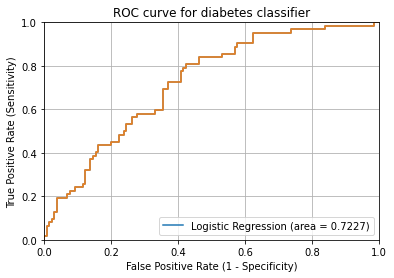

In [140]:
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)
#fpr, tpr, thresholds = roc_curve(y_test, pre)
#plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % model_roc_auc)

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.4f)' % r_auc)
plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)

so the problem is what if we want to check confusion matrix for different  threshold then instead of changing threshold we draw roc_auc curve to do this


In [141]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [142]:

evaluate_threshold(0.5)

Sensitivity: 0.25806451612903225
Specificity: 0.8769230769230769


In [143]:
evaluate_threshold(0.3)

Sensitivity: 0.7258064516129032
Specificity: 0.6307692307692307


In [144]:
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.7425071225071225